In [ ]:
import pandas as pd

In [ ]:
smog = pd.read_excel('Smog.xlsx')

In [ ]:
smog.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
smog['Data'] = smog['Data'].dt.round('H')  

In [ ]:
smog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8771 entries, 0 to 8770
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             8771 non-null   datetime64[ns]
 1   Dwutlenek_azotu  8771 non-null   float64       
 2   Tlenki_azotu     8771 non-null   float64       
 3   PM10             8771 non-null   float64       
 4   PM_2_5           8771 non-null   float64       
 5   Benzen           8771 non-null   float64       
 6   Tlenek_wegla     8771 non-null   float64       
 7   Kierunek_wiatru  8771 non-null   float64       
 8   Predkosc_wiatru  8771 non-null   float64       
 9   Temperatura      8771 non-null   float64       
 10  Wilgotnosc       8771 non-null   float64       
 11  Cisnienie        8771 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 822.4 KB


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib as mpl

In [ ]:
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False

In [ ]:
columns = list(smog.columns)
columns

['Data',
 'Dwutlenek_azotu',
 'Tlenki_azotu',
 'PM10',
 'PM_2_5',
 'Benzen',
 'Tlenek_wegla',
 'Kierunek_wiatru',
 'Predkosc_wiatru',
 'Temperatura',
 'Wilgotnosc',
 'Cisnienie']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fceca5081d0>,
      dtype=object)

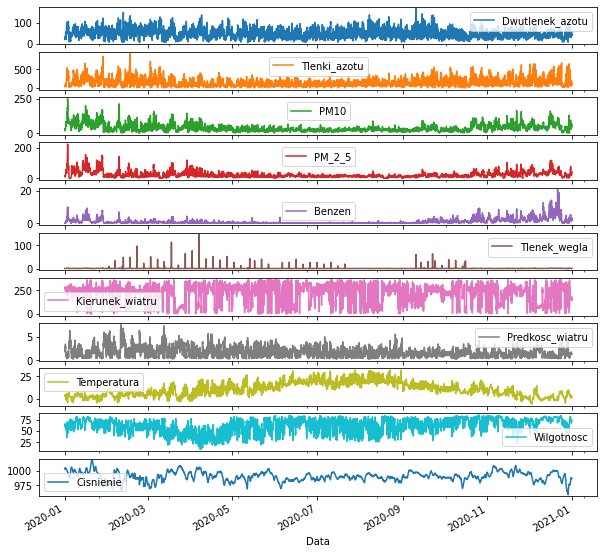

In [ ]:
smog.set_index('Data')[columns[1:]].plot(subplots=True)

In [ ]:
smog.describe()

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie
count,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000
mean,48.771656,144.881708,38.996283,23.107238,1.161349,0.914696,215.145921,1.653480,10.532149,61.215235,990.337655
std,21.036506,102.569510,26.791995,19.945110,1.701866,3.466739,90.207119,1.045425,7.690325,16.590187,7.825082
min,4.100000,0.100000,3.000000,0.000000,0.000000,0.000000,0.000000,0.258333,-6.131667,8.856667,958.881132
25%,33.300000,72.750000,21.100000,10.500000,0.200000,0.500000,161.300000,0.823333,4.298681,49.995417,985.670833
50%,47.100000,120.700000,31.100000,17.100000,0.500000,0.600000,246.000000,1.423333,9.817529,64.578333,990.145833
75%,61.800000,188.200000,48.800000,29.000000,1.400000,0.900000,278.000000,2.206667,16.572500,75.095000,995.750417
max,170.100000,931.500000,248.300000,226.100000,21.100000,147.000000,360.000000,7.626667,32.035000,85.378333,1017.685000


In [ ]:
smog.set_index('Data', inplace=True)

In [ ]:
smog

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie
Data,,,,,,,,,,,
2020-01-01 01:00:00,19.7,35.0,34.3,17.9,0.2,0.7,278.000000,2.471667,4.403333,62.058333,1002.798333
2020-01-01 02:00:00,22.8,43.5,32.2,15.0,0.2,0.7,279.000000,2.200000,4.113333,61.336667,1002.940000
2020-01-01 03:00:00,31.8,68.4,35.7,16.3,0.2,0.8,270.000000,1.906667,3.830000,62.410000,1003.261667
2020-01-01 04:00:00,26.4,52.6,34.0,15.0,0.2,0.7,278.000000,1.998333,3.480000,63.541667,1003.481667
2020-01-01 05:00:00,24.5,50.4,26.1,11.6,0.2,0.7,277.000000,2.248333,3.135000,64.786667,1003.888333
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,44.8,162.2,52.3,28.9,2.4,1.1,159.517241,1.351681,1.893145,73.365169,986.882812
2020-12-31 20:00:00,39.5,108.1,52.6,30.1,2.7,0.9,157.310345,1.428841,1.842346,73.492614,986.892811
2020-12-31 21:00:00,39.3,83.7,47.8,27.3,1.8,0.8,173.034483,1.409485,1.770589,73.711608,986.900253


In [ ]:
smog_input = smog
smog_input

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie
Data,,,,,,,,,,,
2020-01-01 01:00:00,19.7,35.0,34.3,17.9,0.2,0.7,278.000000,2.471667,4.403333,62.058333,1002.798333
2020-01-01 02:00:00,22.8,43.5,32.2,15.0,0.2,0.7,279.000000,2.200000,4.113333,61.336667,1002.940000
2020-01-01 03:00:00,31.8,68.4,35.7,16.3,0.2,0.8,270.000000,1.906667,3.830000,62.410000,1003.261667
2020-01-01 04:00:00,26.4,52.6,34.0,15.0,0.2,0.7,278.000000,1.998333,3.480000,63.541667,1003.481667
2020-01-01 05:00:00,24.5,50.4,26.1,11.6,0.2,0.7,277.000000,2.248333,3.135000,64.786667,1003.888333
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,44.8,162.2,52.3,28.9,2.4,1.1,159.517241,1.351681,1.893145,73.365169,986.882812
2020-12-31 20:00:00,39.5,108.1,52.6,30.1,2.7,0.9,157.310345,1.428841,1.842346,73.492614,986.892811
2020-12-31 21:00:00,39.3,83.7,47.8,27.3,1.8,0.8,173.034483,1.409485,1.770589,73.711608,986.900253


In [ ]:
scaler = MinMaxScaler()
smog_scaled = scaler.fit_transform(smog_input)
smog_scaled

array([[0.0939759 , 0.03747047, 0.12759886, ..., 0.2760262 , 0.69524971,
        0.74684205],
       [0.1126506 , 0.04659652, 0.11903791, ..., 0.26842795, 0.68581883,
        0.74925119],
       [0.16686747, 0.07333047, 0.13330616, ..., 0.26100437, 0.69984536,
        0.75472135],
       ...,
       [0.21204819, 0.08975735, 0.18263351, ..., 0.207046  , 0.84753697,
        0.47648431],
       [0.22409639, 0.1140219 , 0.20179372, ..., 0.20516025, 0.84911666,
        0.47513097],
       [0.21204819, 0.09780975, 0.25968202, ..., 0.20139145, 0.8541656 ,
        0.4727706 ]])

In [ ]:
smog_scaled[0, 2:4] #wartości dla PM10 i PM25 po przeskalowaniu

array([0.12759886, 0.07916851])

In [ ]:
features = smog_scaled
# target = smog_scaled[:,2:4] #predykcja tylko pm10 i pm25
target = smog_scaled #predykcja wszystkiego

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    shuffle=False)

In [ ]:
print('Train data:')
print(X_train.shape, y_train.shape)
print('----------------------------')
print('Test data:')
print(X_test.shape, y_test.shape)

Train data:
(7016, 11) (7016, 11)
----------------------------
Test data:
(1755, 11) (1755, 11)


In [ ]:
win_length = 120    #ostatnie 5 dni
batch_size = 32     #32 serie do uczenia
num_features = 11   #liczba features do uczenia

train_generator = TimeseriesGenerator(X_train, 
                                      y_train, 
                                      length=win_length, 
                                      sampling_rate=1, 
                                      batch_size=batch_size)

test_generator = TimeseriesGenerator(X_test, 
                                      y_test, 
                                      length=win_length, 
                                      sampling_rate=1, 
                                      batch_size=batch_size)

In [ ]:
print(len(test_generator))
print(len(test_generator[0]))
print(len(test_generator[0][0]))
print(len(test_generator[0][0][0]))
print(len(test_generator[0][0][0][0]))

52
2
32
120
11


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(128, 
                               input_shape=(win_length, num_features), 
                               return_sequences=True))
model.add(tf.keras.layers.GRU(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GRU(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(11))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 120, 128)          54144     
                                                                 
 gru_1 (GRU)                 (None, 120, 64)           37248     
                                                                 
 dropout (Dropout)           (None, 120, 64)           0         
                                                                 
 gru_2 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 11)                715       
                                                                 
Total params: 117,067
Trainable params: 117,067
Non-trai

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

In [ ]:
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
history = model.fit_generator(train_generator, epochs=50,
                              validation_data=test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


216/216 [==============================] - 28s 92ms/step - loss: 0.0225 - mean_absolute_error: 0.1090 - val_loss: 0.0160 - val_mean_absolute_error: 0.0926
Epoch 2/50
216/216 [==============================] - 19s 86ms/step - loss: 0.0128 - mean_absolute_error: 0.0810 - val_loss: 0.0111 - val_mean_absolute_error: 0.0735
Epoch 3/50
216/216 [==============================] - 19s 87ms/step - loss: 0.0106 - mean_absolute_error: 0.0718 - val_loss: 0.0096 - val_mean_absolute_error: 0.0654
Epoch 4/50
216/216 [==============================] - 18s 86ms/step - loss: 0.0091 - mean_absolute_error: 0.0650 - val_loss: 0.0087 - val_mean_absolute_error: 0.0610
Epoch 5/50
216/216 [==============================] - 19s 86ms/step - loss: 0.0085 - mean_absolute_error: 0.0618 - val_loss: 0.0079 - val_mean_absolute_error: 0.0561
Epoch 6/50
216/216 [==============================] - 19s 86ms/step - loss: 0.0080 - mean_absolute_error: 0.0590 - val_loss: 0.0078 - val_mean_absolute_error: 0.0561
Epoch 7/50
216/

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.006781995762139559, 0.04983387887477875]

In [ ]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, 
                               input_shape=(win_length, num_features), 
                               return_sequences=True)))
model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(11))

early_stopping1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

model1.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])

history1 = model1.fit_generator(train_generator, epochs=50,
                              validation_data=test_generator,
                              shuffle=False,
                              callbacks=[early_stopping1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
216/216 [==============================] - 58s 213ms/step - loss: 0.0230 - mean_absolute_error: 0.1099 - val_loss: 0.0185 - val_mean_absolute_error: 0.1006
Epoch 2/50
216/216 [==============================] - 44s 202ms/step - loss: 0.0143 - mean_absolute_error: 0.0857 - val_loss: 0.0152 - val_mean_absolute_error: 0.0890
Epoch 3/50
216/216 [==============================] - 44s 202ms/step - loss: 0.0116 - mean_absolute_error: 0.0756 - val_loss: 0.0122 - val_mean_absolute_error: 0.0770
Epoch 4/50
216/216 [==============================] - 43s 201ms/step - loss: 0.0100 - mean_absolute_error: 0.0689 - val_loss: 0.0109 - val_mean_absolute_error: 0.0717
Epoch 5/50
216/216 [==============================] - 44s 202ms/step - loss: 0.0092 - mean_absolute_error: 0.0652 - val_loss: 0.0099 - val_mean_absolute_error: 0.0668
Epoch 6/50
216/216 [==============================] - 44s 202ms/step - loss: 0.0085 - mean_absolute_error: 0.0615 - val_loss: 0.0091 - val_mean_absolute_error: 0.063

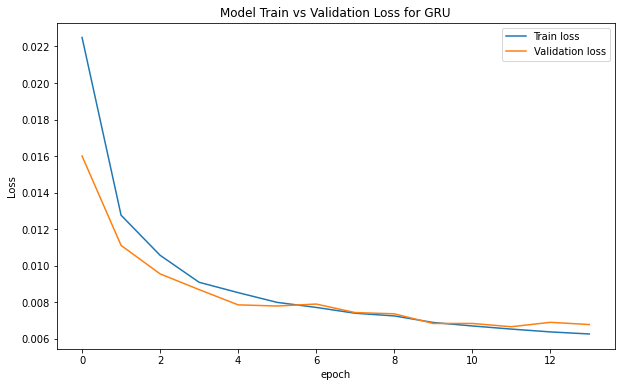

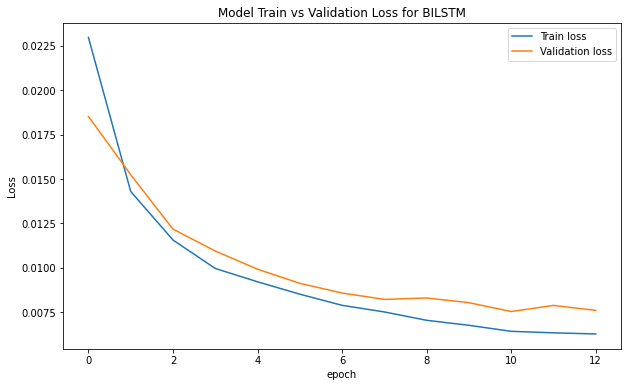

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history, 'GRU')
plot_loss (history1, 'BILSTM')

In [ ]:
predictions = model.predict_generator(test_generator)
predictions1 = model1.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
smog_pred1 = pd.DataFrame(predictions)
smog_pred2 = pd.DataFrame(predictions1)

In [ ]:
smog_pred_rev1 = scaler.inverse_transform(smog_pred1)
smog_pred_rev2 = scaler.inverse_transform(smog_pred2)

In [ ]:
smog_final1 = smog_input[predictions.shape[0]*-1:]
smog_final2 = smog_input[predictions.shape[0]*-1:]

In [ ]:
smog_final1['Dwutlenek_azotu_Pred'] = smog_pred_rev1[:, 0]
smog_final1['Tlenki_azotu_Pred'] = smog_pred_rev1[:, 1]
smog_final1['PM10_Pred'] = smog_pred_rev1[:, 2]
smog_final1['PM_2_5_Pred'] = smog_pred_rev1[:, 3]
smog_final1['Benzen_Pred'] = smog_pred_rev1[:, 4]
smog_final1['Tlenek_wegla_Pred'] = smog_pred_rev1[:, 5]
smog_final1['Kierunek_wiatru_Pred'] = smog_pred_rev1[:, 6]
smog_final1['Predkosc_wiatru_Pred'] = smog_pred_rev1[:, 7]
smog_final1['Temperatura_Pred'] = smog_pred_rev1[:, 8]
smog_final1['Wilgotnosc_Pred'] = smog_pred_rev1[:, 9]
smog_final1['Cisnienie_Pred'] = smog_pred_rev1[:, 10]


smog_final2['Dwutlenek_azotu_Pred'] = smog_pred_rev2[:, 0]
smog_final2['Tlenki_azotu_Pred'] = smog_pred_rev2[:, 1]
smog_final2['PM10_Pred'] = smog_pred_rev2[:, 2]
smog_final2['PM_2_5_Pred'] = smog_pred_rev2[:, 3]
smog_final2['Benzen_Pred'] = smog_pred_rev2[:, 4]
smog_final2['Tlenek_wegla_Pred'] = smog_pred_rev2[:, 5]
smog_final2['Kierunek_wiatru_Pred'] = smog_pred_rev2[:, 6]
smog_final2['Predkosc_wiatru_Pred'] = smog_pred_rev2[:, 7]
smog_final2['Temperatura_Pred'] = smog_pred_rev2[:, 8]
smog_final2['Wilgotnosc_Pred'] = smog_pred_rev2[:, 9]
smog_final2['Cisnienie_Pred'] = smog_pred_rev2[:, 10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
smog_final2

,Dwutlenek_azotu,Tlenki_azotu,PM10,PM_2_5,Benzen,Tlenek_wegla,Kierunek_wiatru,Predkosc_wiatru,Temperatura,Wilgotnosc,Cisnienie,Dwutlenek_azotu_Pred,Tlenki_azotu_Pred,PM10_Pred,PM_2_5_Pred,Benzen_Pred,Tlenek_wegla_Pred,Kierunek_wiatru_Pred,Predkosc_wiatru_Pred,Temperatura_Pred,Wilgotnosc_Pred,Cisnienie_Pred
Data,,,,,,,,,,,,,,,,,,,,,,
2020-10-24 19:00:00,48.9,280.6,50.4,21.6,2.2,1.1,279.000000,2.086667,9.420000,83.455000,990.400000,48.942551,179.066086,29.355822,21.877720,1.717622,0.699920,283.712585,1.092158,9.468820,77.246483,987.846191
2020-10-24 20:00:00,40.8,195.4,53.4,28.6,2.5,1.0,293.000000,2.421667,8.531667,83.931667,990.500000,45.242527,167.037949,29.689417,21.696514,1.698705,0.834986,273.866791,1.308973,8.893249,77.055847,987.573303
2020-10-24 21:00:00,36.6,229.1,62.9,35.0,4.0,1.3,314.000000,2.055000,7.468333,84.093333,990.401667,35.159031,130.796219,28.401556,21.238646,1.629176,0.861912,278.681122,1.529369,8.144487,77.989532,987.488159
2020-10-24 22:00:00,28.0,150.5,49.1,28.9,3.4,1.0,295.000000,2.208333,7.716667,84.470000,990.266667,29.172781,110.307289,30.377497,22.830200,1.656826,0.931282,289.946228,1.508419,7.506229,78.529816,987.410889
2020-10-24 23:00:00,23.5,122.9,60.8,39.2,5.1,1.1,294.000000,2.265000,7.663333,84.769167,990.027500,20.426188,80.226524,28.671478,21.917728,1.571177,0.985270,290.479919,1.578719,6.952342,79.233986,987.348206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,44.8,162.2,52.3,28.9,2.4,1.1,159.517241,1.351681,1.893145,73.365169,986.882812,50.455860,184.691742,36.714848,27.434771,1.658311,0.815096,188.006180,1.132478,5.014699,76.085815,986.836182
2020-12-31 20:00:00,39.5,108.1,52.6,30.1,2.7,0.9,157.310345,1.428841,1.842346,73.492614,986.892811,47.077030,171.374359,37.000355,28.081711,1.657732,0.837709,186.995773,1.150898,4.718763,77.081993,986.894592
2020-12-31 21:00:00,39.3,83.7,47.8,27.3,1.8,0.8,173.034483,1.409485,1.770589,73.711608,986.900253,40.359375,145.571533,36.492676,28.471542,1.626284,0.885898,186.269714,1.212043,4.435664,77.916580,986.972107


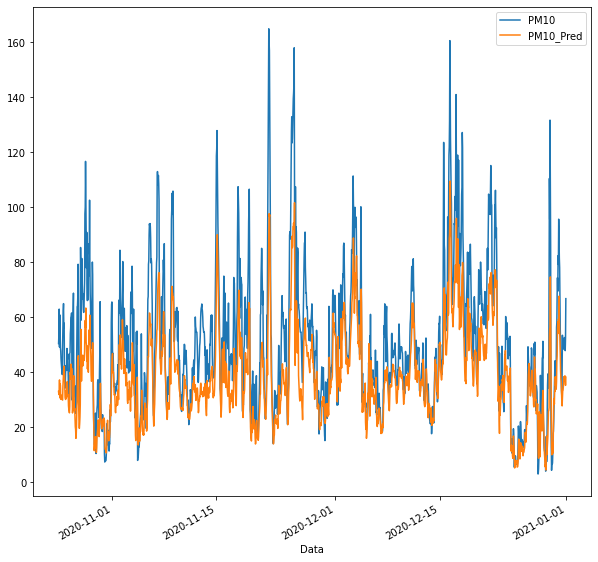

In [ ]:
smog_final1[['PM10', 'PM10_Pred']].plot()

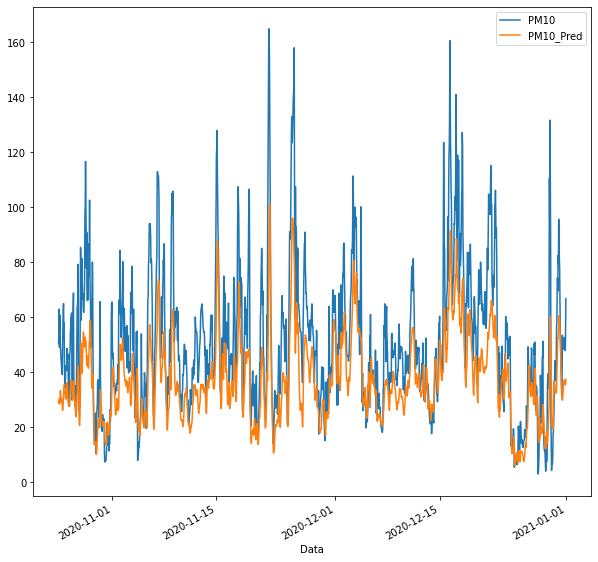

In [ ]:
smog_final2[['PM10', 'PM10_Pred']].plot()

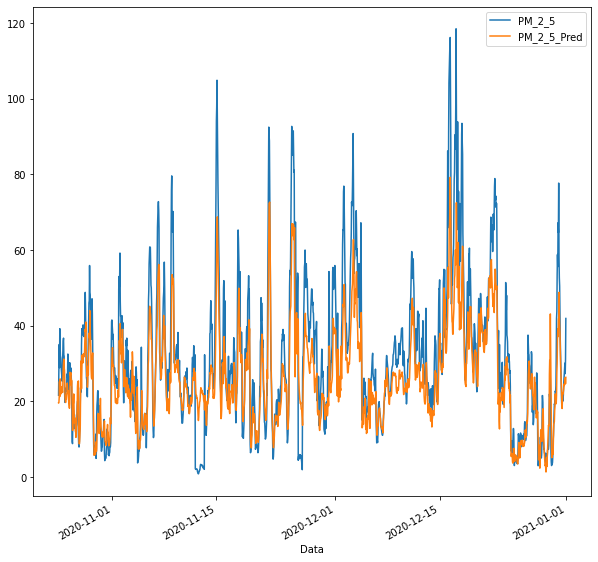

In [ ]:
smog_final1[['PM_2_5', 'PM_2_5_Pred']].plot()

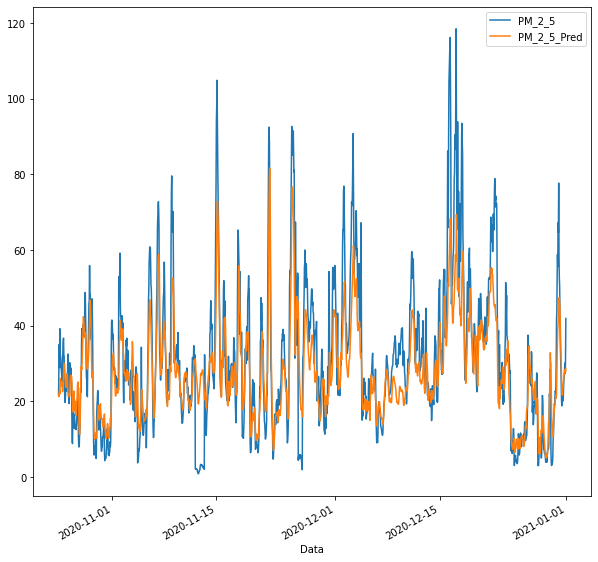

In [ ]:
smog_final2[['PM_2_5', 'PM_2_5_Pred']].plot()

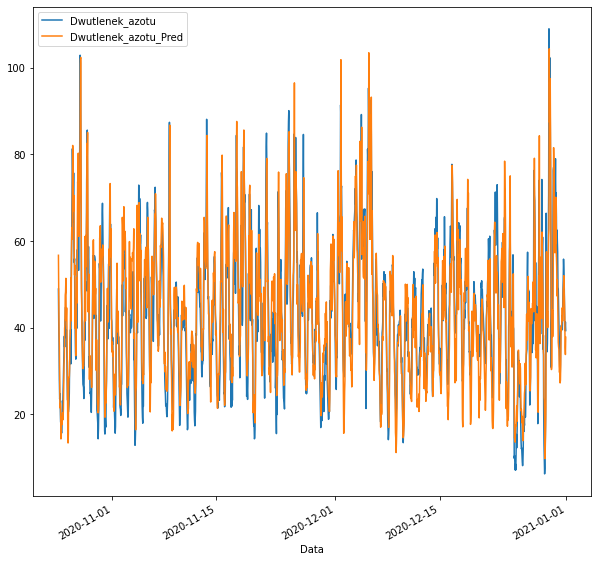

In [ ]:
smog_final1[['Dwutlenek_azotu', 'Dwutlenek_azotu_Pred']].plot()

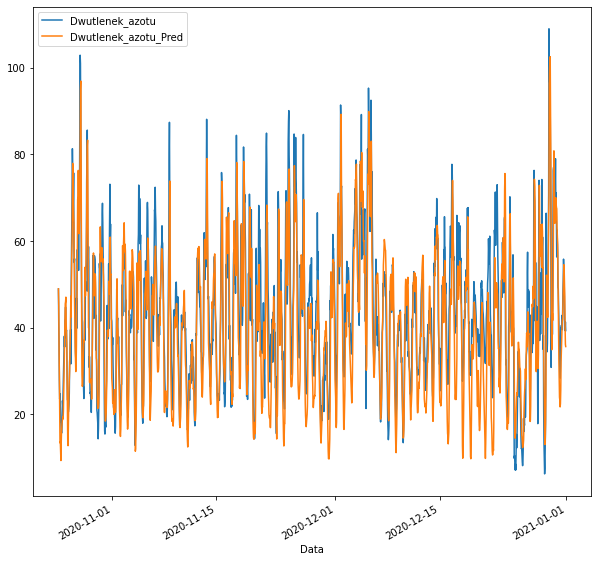

In [ ]:
smog_final2[['Dwutlenek_azotu', 'Dwutlenek_azotu_Pred']].plot()

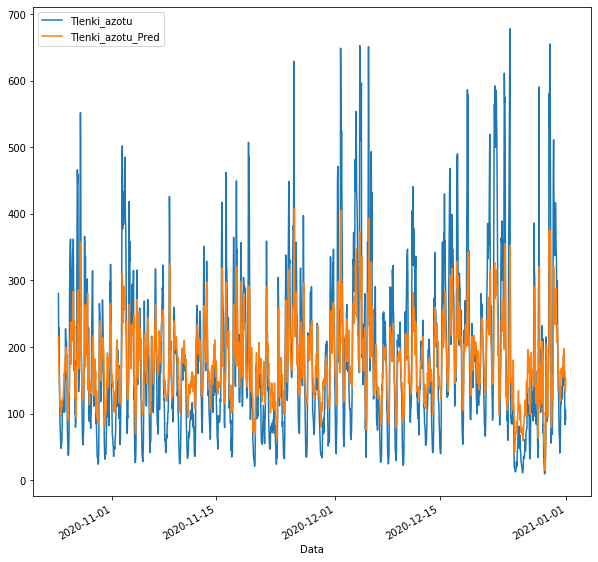

In [ ]:
smog_final1[['Tlenki_azotu', 'Tlenki_azotu_Pred']].plot()

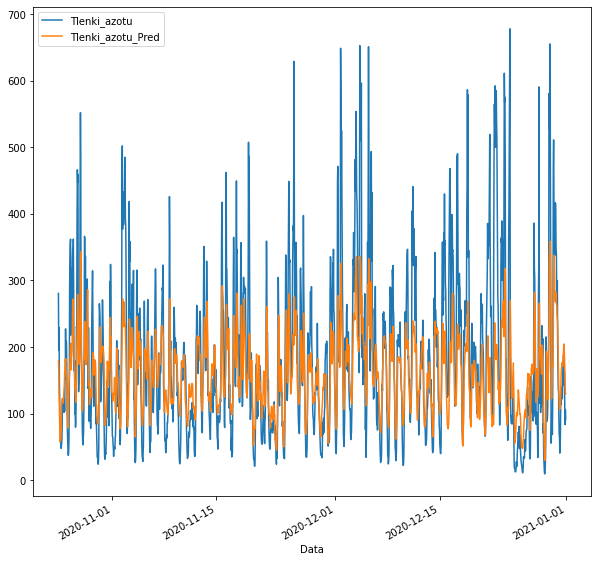

In [ ]:
smog_final2[['Tlenki_azotu', 'Tlenki_azotu_Pred']].plot()

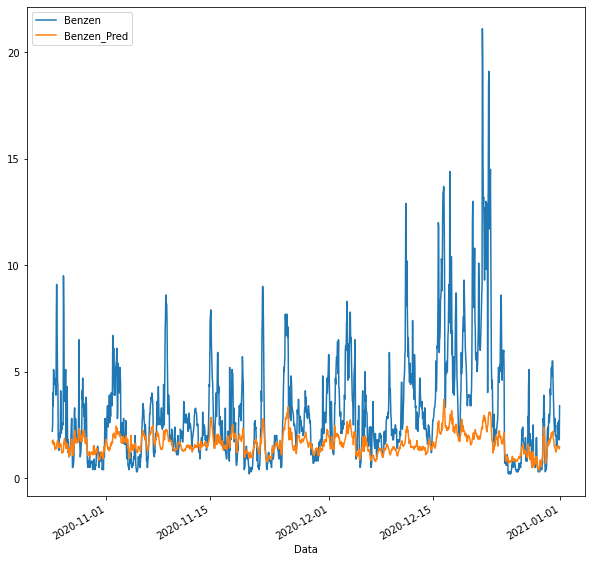

In [ ]:
smog_final1[['Benzen', 'Benzen_Pred']].plot()

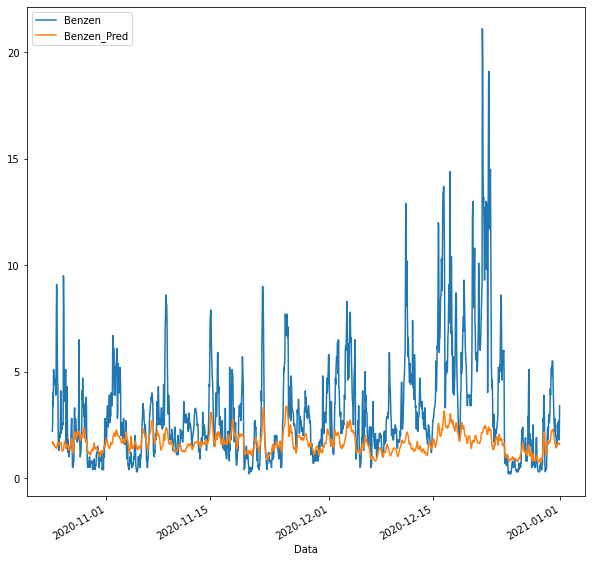

In [ ]:
smog_final2[['Benzen', 'Benzen_Pred']].plot()

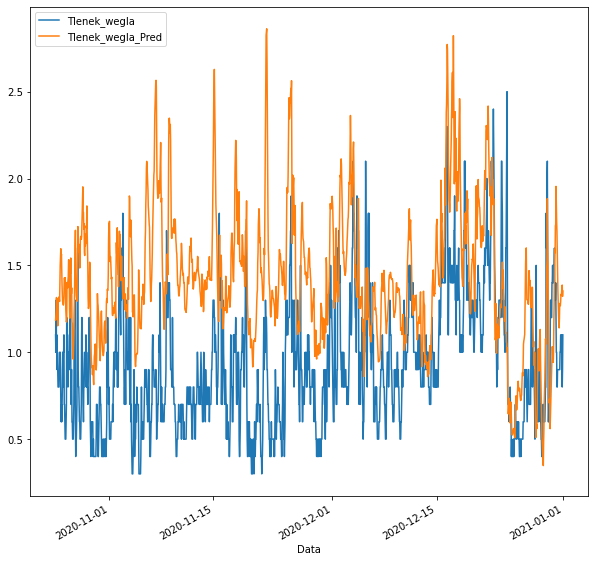

In [ ]:
smog_final1[['Tlenek_wegla', 'Tlenek_wegla_Pred']].plot()

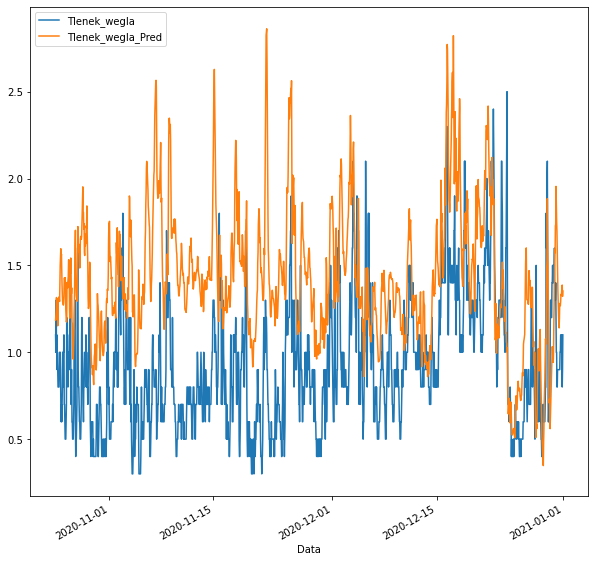

In [ ]:
smog_final[['Tlenek_wegla', 'Tlenek_wegla_Pred']].plot()

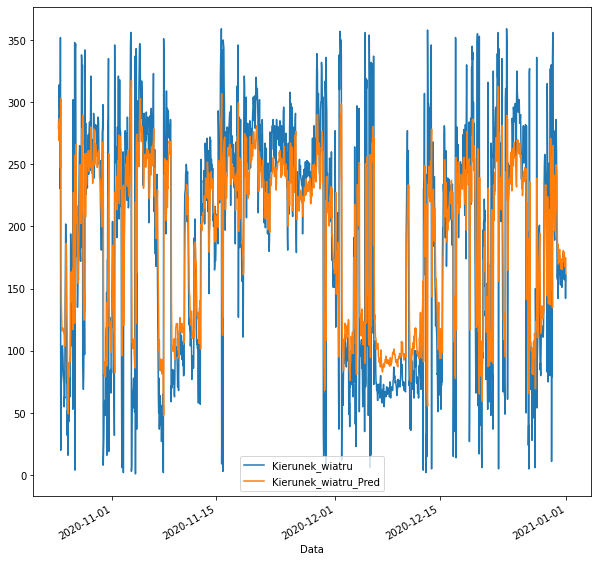

In [ ]:
smog_final[['Kierunek_wiatru', 'Kierunek_wiatru_Pred']].plot()

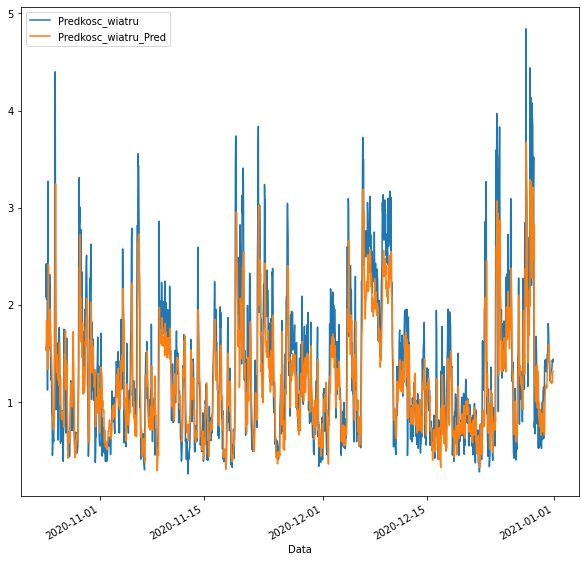

In [ ]:
smog_final[['Predkosc_wiatru', 'Predkosc_wiatru_Pred']].plot()

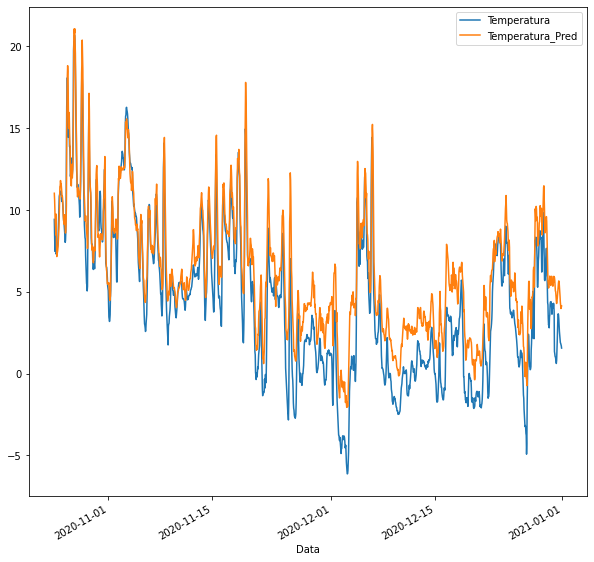

In [ ]:
smog_final[['Temperatura', 'Temperatura_Pred']].plot()

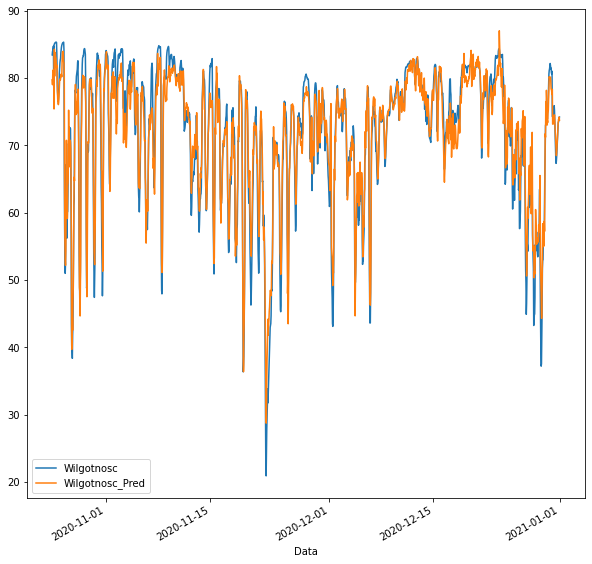

In [ ]:
smog_final[['Wilgotnosc', 'Wilgotnosc_Pred']].plot()

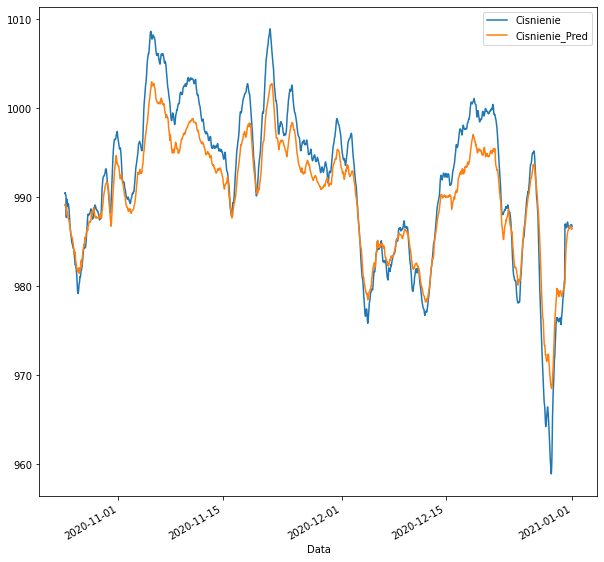

In [ ]:
smog_final1[['Cisnienie', 'Cisnienie_Pred']].plot()

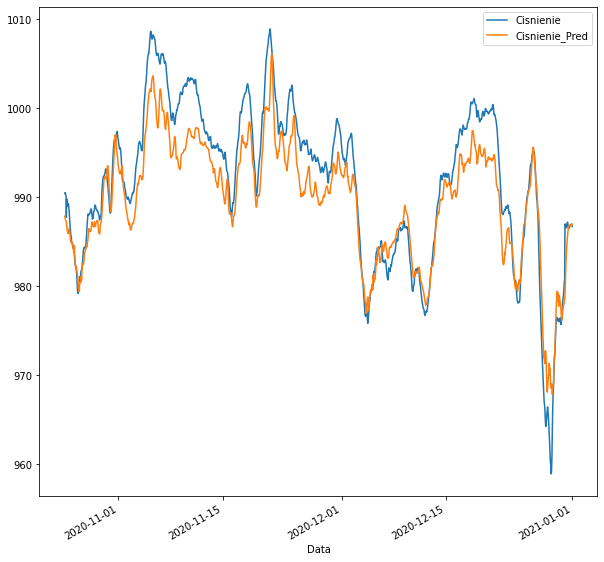

In [ ]:
smog_final2[['Cisnienie', 'Cisnienie_Pred']].plot()